Inną ważną transformacją jest SVD. Zanim opowiemy sobie o szczegółach chcemy sprawdzić jak różni się od PCA. W tym celu bierzemy ten sam zbiór z UCI i dokonujemy wizualizacji 2D klas po zredukowaniu danych. Czy są jakieś różnice?

Czy normalizowali Państwo dane? Proszę przetestować dwa warianty - jeden z normalizacją a drugi bez.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['1', '2', '3', '4', 'class']
df.dropna(how="all", inplace=True) # usuwamy puste rekordy

print(df['class'].unique())
print(df.shape)
df.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
(150, 5)


,1,2,3,4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

print(X[:5, :])
print(y[:5])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [3]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(X_std[:5, :])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [4]:
from sklearn.decomposition import TruncatedSVD as svd
svd_model = svd(n_components=2)
X_svd = svd_model.fit_transform(X_std)

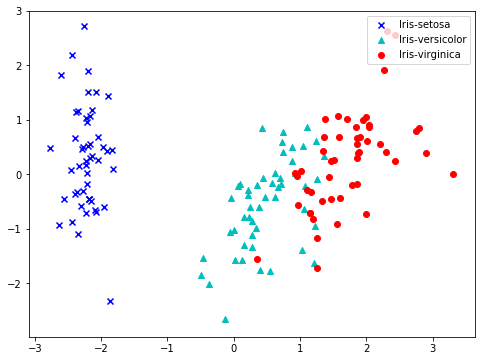

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

colors = ['b', 'c', 'r']
fig = plt.figure(figsize=(8,6))
plt.scatter(X_svd[np.where(y == 'Iris-setosa')[0], 0], X_svd[np.where(y == 'Iris-setosa')[0], 1],
            marker='x', color=colors[0], label='Iris-setosa')
plt.scatter(X_svd[np.where(y == 'Iris-versicolor')[0], 0], X_svd[np.where(y == 'Iris-versicolor')[0], 1], 
            marker='^', color=colors[1], label='Iris-versicolor')
plt.scatter(X_svd[np.where(y == 'Iris-virginica')[0], 0], X_svd[np.where(y == 'Iris-virginica')[0], 1], 
            marker='o', color=colors[2], label='Iris-virginica')
plt.legend(loc='upper right')
plt.show(fig);

In [6]:
svd_model = svd(n_components=2)
X_svd = svd_model.fit_transform(X)

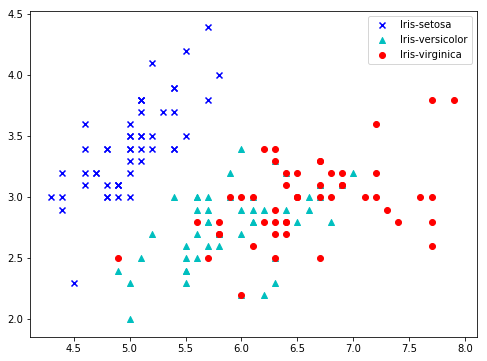

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

colors = ['b', 'c', 'r']
fig = plt.figure(figsize=(8,6))
plt.scatter(X[np.where(y == 'Iris-setosa')[0], 0], X[np.where(y == 'Iris-setosa')[0], 1],
            marker='x', color=colors[0], label='Iris-setosa')
plt.scatter(X[np.where(y == 'Iris-versicolor')[0], 0], X[np.where(y == 'Iris-versicolor')[0], 1], 
            marker='^', color=colors[1], label='Iris-versicolor')
plt.scatter(X[np.where(y == 'Iris-virginica')[0], 0], X[np.where(y == 'Iris-virginica')[0], 1], 
            marker='o', color=colors[2], label='Iris-virginica')
plt.legend(loc='upper right')
plt.show(fig);

Jeśli dane są wyśrodkowane i znormalizowane to redukcja SVD i PCA to jest to samo. Z punktu widzenia redukcji wymiarowości PCA powinno dawać lepsze wyniki, bo dane są skalowane.

Algorytm dekompozycji SVD jest szybszy niż PCA (stosuje się metody przybliżone np. TruncatedSVD). SVD ma ścisły związek z PCA i można go wykorzystać do PCA.

Proszę spróbować wziąć zbiór z UCI i porównać wyniki SVD i PCA w kontekście klasyfikacji (SVD bez normalizacji).